# 🧮 Curso de Teoría de Grupos Finita
Basado en *AATA (Judson)* y *Adventures in Group Theory (Joyner)*  
Ambiente sugerido: **SageMath / JupyterLab**

---

## 📘 Módulo 1 — Qué es un grupo

### Definición
Un **grupo** es un par $(G, *)$ donde:
1. **Clausura:** si $a,b \in G$, entonces $a*b \in G$.
2. **Asociatividad:** $(a*b)*c = a*(b*c)$.
3. **Elemento neutro:** existe $e \in G$ tal que $a*e = e*a = a$.
4. **Inverso:** para cada $a$, existe $a^{-1}$ tal que $a*a^{-1} = e$.

Si además $a*b = b*a$, el grupo es **abeliano**.

---

### Ejemplos
| Grupo | Operación | Neutro | Inverso de $a$ | ¿Abeliano? |
|--------|------------|---------|------------------|-------------|
| $(\mathbb{Z}, +)$ | suma | 0 | −a | ✅ |
| $(\mathbb{Q}^*, \cdot)$ | producto | 1 | 1/a | ✅ |
| $(\mathbb{Z}_n, +)$ | suma módulo n | 0 | n−a | ✅ |
| $U(n)=\{a\in \mathbb{Z}_n: \gcd(a,n)=1\}$ | producto mod n | 1 | inverso modular | ✅ |
| $S_3$ | composición | id | inversa de permutación | ❌ |

---

### 🔢 En SageMath


In [1]:
# Grupo de unidades mod 8
Zn = IntegerModRing(8)
U8 = Zn.unit_group()
U8, list(U8), U8.is_abelian(), [a^-1 for a in U8]

(Multiplicative Abelian group isomorphic to C2 x C2,
 [1, f1, f0, f0*f1],
 True,
 [1, f1, f0, f0*f1])

---
## 🧠 Ejercicios
1. Verificá que $(\mathbb{Z}_n,+)$ cumple los axiomas.
2. Mostrá que $(\mathbb{Z}_n, \cdot)$ no es grupo.
3. Hallá $U(8)$ y el inverso de 3 mod 8.
4. Analizá las rotaciones de un triángulo equilátero: ¿forman un grupo?

---
## 📊 Visualización opcional


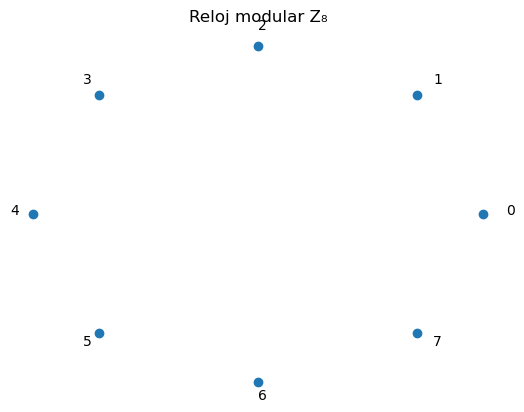

In [2]:
import matplotlib.pyplot as plt, numpy as np
n=8; theta=np.linspace(0,2*np.pi,n,endpoint=False)
x=np.cos(theta); y=np.sin(theta)
plt.scatter(x,y); [plt.text(1.1*x[i],1.1*y[i],str(i)) for i in range(n)]
plt.axis('off'); plt.title('Reloj modular Z₈'); plt.show()

# 📘 Módulo 2 — Subgrupos, generadores y órdenes

### Definiciones
- Subgrupo $H\le G$ si $e\in H$ y $a,b\in H \Rightarrow ab^{-1}\in H$.
- Subgrupo generado por $a$: $\langle a \rangle = \{a^k:k\in\mathbb{Z}\}$.
- Orden de $a$: el menor $m>0$ tal que $a^m=e$.

---
### Ejemplo: $D_4$
$D_4 = \langle r,s \mid r^4=s^2=1, srs=r^{-1} \rangle$.

---
### En SageMath


In [3]:
G = DihedralGroup(4)
G.order(), G.gens(), [x.order() for x in G.gens()], [H.order() for H in G.subgroups()]

(8, ((1,2,3,4), (1,4)(2,3)), [4, 2], [1, 2, 2, 2, 2, 2, 4, 4, 4, 8])

---
## Ejercicios
1. Enumerar subgrupos de $\mathbb{Z}_{12}$.
2. Mostrar que el conjunto de rotaciones de $D_4$ es subgrupo.
3. Calcular órdenes de elementos de $D_4$.
4. Bonus: número de subgrupos cíclicos de $\mathbb{Z}_{12}$.

---
## Visualización (rotación de cuadrado)


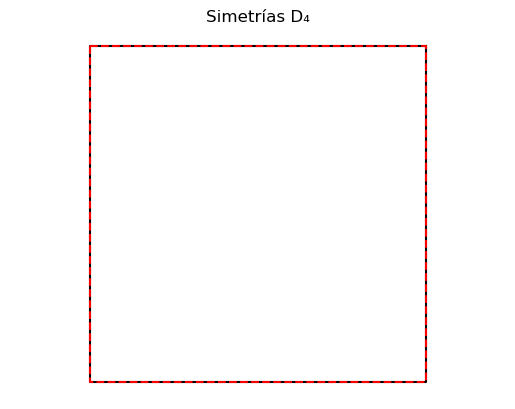

In [4]:
import numpy as np, matplotlib.pyplot as plt
sq=np.array([[1,1],[1,-1],[-1,-1],[-1,1],[1,1]])
R=np.array([[0,-1],[1,0]])
plt.plot(sq[:,0],sq[:,1],'k-'); plt.plot((sq@R.T)[:,0],(sq@R.T)[:,1],'r--')
plt.axis('equal'); plt.axis('off'); plt.title('Simetrías D₄'); plt.show()

# 📘 Módulo 3 — Permutaciones y ciclos

### Definición
Una **permutación** de $\{1,\dots,n\}$ es una biyección.  
El conjunto de todas ellas forma el **grupo simétrico** $S_n$.

#### Propiedades
- Toda permutación se descompone en ciclos disjuntos.
- El orden de una permutación = m.c.m. de longitudes de sus ciclos.
- Permutaciones pares/imp. según número de transposiciones.


In [5]:
S3 = SymmetricGroup(3)
sigma, tau = S3('(1,2,3)'), S3('(1,2)')
sigma.order(), sigma.sign(), tau.sign(), sigma*tau

(3, 1, -1, (2,3))

## Ejercicios
1. Listar todas las permutaciones de $S_3$ en notación cíclica.
2. Probar que $S_3$ no es abeliano.
3. Calcular orden de $(1 2 3 4 5)(6 7)$.
4. Producto de dos permutaciones impares es par.

---
## Mini puzzle 3×3


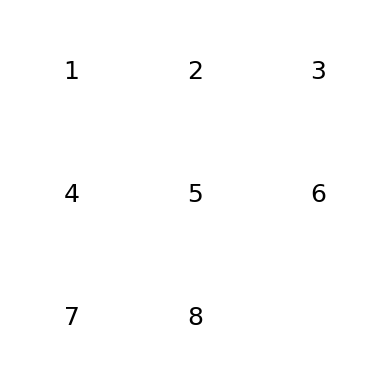

In [6]:
import numpy as np, matplotlib.pyplot as plt
state=np.array([[1,2,3],[4,5,6],[7,8,0]])
plt.imshow(np.ones_like(state)*0.9,cmap='Greys')
for i in range(3):
  for j in range(3):
    if state[i,j]!=0: plt.text(j,i,str(state[i,j]),ha='center',va='center',fontsize=18)
plt.axis('off'); plt.show()

# 📘 Módulo 4 — Homomorfismos e Isomorfismos

### Definición
Una función $\phi:G\to H$ es **homomorfismo** si $\phi(ab)=\phi(a)\phi(b)$.

### Núcleo e imagen
$$\ker(\phi)=\{g\in G: \phi(g)=e_H\},\quad \operatorname{Im}(\phi)=\{\phi(g):g\in G\}$$

### Primer teorema de isomorfía
$$G/\ker(\phi) \cong \operatorname{Im}(\phi)$$


In [ ]:
G = DihedralGroup(4)
N = G.subgroup([G.gen(0)^2])
Q = G.quotient(N)
Q.structure_description()

# 📘 Módulo 5 — Acciones de grupo y órbitas

### Definición
Una **acción** es $G\times X\to X$, $(g,x)\mapsto g\cdot x$, con:
$e\cdot x=x$, $(gh)\cdot x=g\cdot(h\cdot x)$.

### Fórmula órbita–estabilizador
$$|G|=|\text{Orb}(x)|\,|\text{Stab}(x)|$$

### Lema de Burnside
$$N=\frac{1}{|G|}\sum_{g\in G}|\text{Fix}(g)|$$


In [ ]:
var('k')
G=DihedralGroup(4); PG=G.permutation_group()
def fixcount(g): return k^(len(g.cycle_tuples()))
(1/PG.order())*sum(fixcount(g) for g in PG)

### Juegos de permutaciones
- **15-puzzle:** sólo permutaciones pares.
- **Cubo 2×2:** orientaciones $\mathbb{Z}_3^7$ y permutaciones $A_8$.


In [ ]:
from sage.groups.perm_gps.permgroup_named import AlternatingGroup
A8 = AlternatingGroup(8)
3**7 * A8.order()

# 📘 Módulo 6 — Cosets, índice y Lagrange

### Cosets
$aH=\{ah:h\in H\}$, índice $[G:H]=$ número de cosets.

### Teorema de Lagrange
$$|G|=|H|\,[G:H]$$

---
### En $\mathbb{Z}$
$a\equiv b\pmod{n} \iff a-b\in n\mathbb{Z}$, las clases son cosets de $n\mathbb{Z}$.


In [ ]:
Z=ZZ; n=5
[[x for x in range(i,20,n)] for i in range(n)]

# 📘 Módulo 7 — Productos directos y semidirectos

### Producto directo
$(g_1,h_1)(g_2,h_2)=(g_1g_2,h_1h_2)$.

### Producto semidirecto
$G=N\rtimes H$, con acción $\varphi(h)(n)=hnh^{-1}$.

#### Ejemplo: $D_4=C_4\rtimes C_2$
$srs^{-1}=r^{-1}$.


In [ ]:
G=DihedralGroup(4)
r,s=G.gens(); s*r*s^-1